# API 연동
공공데이터포털 오픈API 데이터형은 JSON을 XML로 전달 -> requests와 딕셔너리를 활용하면 됨

# JSON 활용 연습

In [1]:
import requests, json, pandas as pd

In [2]:
URL = 'http://www.krei.re.kr:18181/chart/main_chart/index/kind/W/sdate/2019-01-01/edate/2019-12-31'
resp = requests.get(URL)

In [3]:
resp

<Response [200]>

In [4]:
data1 = resp.text
print(type(data1), len(data1))

<class 'str'> 37824


In [ ]:
data2 = resp.json()
print(type(data2), len(data2))
data2

In [8]:
# 필요한 것들만 추출하기! 
id_, date, symbol, open_, close = [], [], [], [] ,[]
for item in data2:
    id_.append(item['id'])
    date.append(item['date'])
    symbol.append(item['symbol'])
    open_.append(item['open'])
    close.append(item['close'])

In [9]:
df = pd.DataFrame({
    'id': id_,
    'date': date,
    'symbol': symbol,
    'open': open_,
    'close': close
})
df.head()

,id,date,symbol,open,close
0,41596,20190102,None,184.63,186.29
1,41597,20190103,None,186.2,188.77
2,41603,20190104,None,188.77,189.59
3,41609,20190107,None,190.33,189.78
4,41610,20190108,None,189.78,190.79


# 공공데이터포털 API 아파트매매 실거래자료 수집

In [14]:
from bs4 import BeautifulSoup

In [16]:
date = '201512'
region_code = '11110'
service_key = 'Bj9qwsP6aGk2kHvayNSukZU5phr3xGFuN%2BSovmuYpzdjG%2FDbychkMLrN8LTANjZI9LPxOluDvxQ0c%2BgxvWXIZg%3D%3D'

PATH = f'http://openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTrade?LAWD_CD={region_code}&DEAL_YMD={date}&serviceKey={service_key}'
res = requests.get(PATH)
res

<Response [200]>

In [ ]:
textsrc = res.text
textsrc

In [21]:
BeautifulSoup?

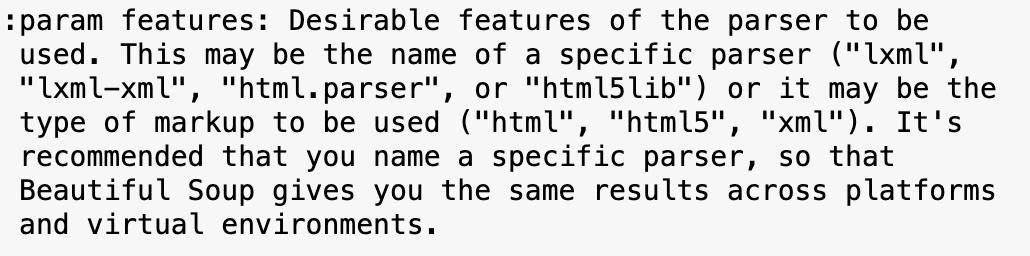

In [ ]:
soup = BeautifulSoup(textsrc, 'xml')
soup

In [46]:
items = soup.select('response > body > items > item')
print(items[0])
print(items[0].select_one('거래금액').text) # select_one은 tag 객체를 바로 반환
# 왜 공백이 있을까? var와 char의 차이!! 글자수를 고정하면 속도가 빨라지기 때문에!

<item><거래금액>      82,500</거래금액><거래유형> </거래유형><건축년도>2008</건축년도><년>2015</년><등기일자> </등기일자><법정동> 사직동</법정동><아파트>광화문스페이스본(101동~105동)</아파트><월>12</월><일>10</일><전용면적>94.51</전용면적><중개사소재지> </중개사소재지><지번>9</지번><지역코드>11110</지역코드><층>11</층><해제사유발생일> </해제사유발생일><해제여부> </해제여부></item>
      82,500


In [51]:
items[0].select('거래금액')[0].text # select는 List 형태로 반환!

'      82,500'

In [52]:
items[0].select_one('거래유형').text

' '

In [53]:
for item in items:
    print(item.select_one('거래금액').text.strip(),
          item.select_one('거래유형').text.strip(),
          item.select_one('건축년도').text.strip(),
          item.select_one('년').text.strip(),
          item.select_one('등기일자').text.strip(),
          item.select_one('법정동').text.strip(),
          item.select_one('아파트').text.strip(),
          item.select_one('월').text.strip(),
          item.select_one('일').text.strip(),
          item.select_one('전용면적').text.strip(),
          item.select_one('중개사소재지').text.strip(),
          item.select_one('지번').text.strip(),
          item.select_one('지역코드').text.strip(),
          item.select_one('층').text.strip(),
          item.select_one('해제사유발생일').text.strip(),
          item.select_one('해제여부').text.strip())

82,500  2008 2015  사직동 광화문스페이스본(101동~105동) 12 10 94.51  9 11110 11  
60,000  1981 2015  당주동 롯데미도파광화문빌딩 12 22 149.95  145 11110 8  
130,000  2004 2015  내수동 킹스매너 12 8 194.43  110-15 11110 6  
105,000  2004 2015  내수동 경희궁의아침2단지 12 14 124.17  71 11110 8  
120,000  2003 2015  내수동 경희궁파크팰리스 12 24 146.33  95 11110 4  
17,000  2014 2015  연건동 이화에수풀 12 17 16.98  195-10 11110 8  
17,000  2014 2015  연건동 이화에수풀 12 18 16.98  195-10 11110 4  
57,000  2006 2015  명륜1가 렉스빌 12 29 106.98  19 11110 3  
44,000  1995 2015  명륜2가 아남1 12 1 84.8  4 11110 18  
52,000  1995 2015  명륜2가 아남1 12 10 84.9  4 11110 12  
49,800  1995 2015  명륜2가 아남1 12 19 84.8  4 11110 1  
41,000  1999 2015  명륜2가 아남3 12 19 61.13  237 11110 7  
41,000  1999 2015  창신동 두산 12 2 59.95  232 11110 9  
19,500  1966 2015  창신동 동대문 12 3 28.8  328-17 11110 6  
39,900  2003 2015  창신동 창신이수 12 3 68.06  23-816 11110 8  
20,800  1966 2015  창신동 동대문 12 7 28.8  328-17 11110 3  
27,200  1993 2015  창신동 창신쌍용2 12 7 64.66  703 11110 3  
39,000  1999 2015  창신동 두산 12 1

In [54]:
tag_list = ['거래금액', '거래유형', '건축년도', '년', '등기일자', '법정동', '아파트', '월', '일', '전용면적', '중개사소재지', 
            '지번', '지역코드', '층','해제사유발생일', '해제여부' ]

for item in items:
    for tag in tag_list:
        print(item.select_one(f'{tag}').text.strip(), end=' ')
    print()

82,500  2008 2015  사직동 광화문스페이스본(101동~105동) 12 10 94.51  9 11110 11   
60,000  1981 2015  당주동 롯데미도파광화문빌딩 12 22 149.95  145 11110 8   
130,000  2004 2015  내수동 킹스매너 12 8 194.43  110-15 11110 6   
105,000  2004 2015  내수동 경희궁의아침2단지 12 14 124.17  71 11110 8   
120,000  2003 2015  내수동 경희궁파크팰리스 12 24 146.33  95 11110 4   
17,000  2014 2015  연건동 이화에수풀 12 17 16.98  195-10 11110 8   
17,000  2014 2015  연건동 이화에수풀 12 18 16.98  195-10 11110 4   
57,000  2006 2015  명륜1가 렉스빌 12 29 106.98  19 11110 3   
44,000  1995 2015  명륜2가 아남1 12 1 84.8  4 11110 18   
52,000  1995 2015  명륜2가 아남1 12 10 84.9  4 11110 12   
49,800  1995 2015  명륜2가 아남1 12 19 84.8  4 11110 1   
41,000  1999 2015  명륜2가 아남3 12 19 61.13  237 11110 7   
41,000  1999 2015  창신동 두산 12 2 59.95  232 11110 9   
19,500  1966 2015  창신동 동대문 12 3 28.8  328-17 11110 6   
39,900  2003 2015  창신동 창신이수 12 3 68.06  23-816 11110 8   
20,800  1966 2015  창신동 동대문 12 7 28.8  328-17 11110 3   
27,200  1993 2015  창신동 창신쌍용2 12 7 64.66  703 11110 3   
39,000  1999 

## 결측값 채우기

In [56]:
def default_text(node, text):
    if node != None:
        return node.text.strip()
    else:
        return text

for item in items:
    for tag in tag_list:
        print(default_text(item.select_one(tag), ''), end=' ')
    print()

82,500  2008 2015  사직동 광화문스페이스본(101동~105동) 12 10 94.51  9 11110 11   
60,000  1981 2015  당주동 롯데미도파광화문빌딩 12 22 149.95  145 11110 8   
130,000  2004 2015  내수동 킹스매너 12 8 194.43  110-15 11110 6   
105,000  2004 2015  내수동 경희궁의아침2단지 12 14 124.17  71 11110 8   
120,000  2003 2015  내수동 경희궁파크팰리스 12 24 146.33  95 11110 4   
17,000  2014 2015  연건동 이화에수풀 12 17 16.98  195-10 11110 8   
17,000  2014 2015  연건동 이화에수풀 12 18 16.98  195-10 11110 4   
57,000  2006 2015  명륜1가 렉스빌 12 29 106.98  19 11110 3   
44,000  1995 2015  명륜2가 아남1 12 1 84.8  4 11110 18   
52,000  1995 2015  명륜2가 아남1 12 10 84.9  4 11110 12   
49,800  1995 2015  명륜2가 아남1 12 19 84.8  4 11110 1   
41,000  1999 2015  명륜2가 아남3 12 19 61.13  237 11110 7   
41,000  1999 2015  창신동 두산 12 2 59.95  232 11110 9   
19,500  1966 2015  창신동 동대문 12 3 28.8  328-17 11110 6   
39,900  2003 2015  창신동 창신이수 12 3 68.06  23-816 11110 8   
20,800  1966 2015  창신동 동대문 12 7 28.8  328-17 11110 3   
27,200  1993 2015  창신동 창신쌍용2 12 7 64.66  703 11110 3   
39,000  1999 

In [ ]:
# dataframe으로 변환 -> csv 파일 저장
import pandas as pd

tag_list = ['거래금액', '거래유형', '건축년도', '년', '등기일자', '법정동', '아파트', '월', '일', '전용면적', '중개사소재지', 
            '지번', '지역코드', '층','해제사유발생일', '해제여부']

data = []


for item in items:
    data_list=[]
    for tag in tag_list:
        data_list.append(default_text(item.select_one(tag), ''))
    data.append(data_list)

df = pd.DataFrame(data, columns=tag_list)
print(df)
df.to_csv('./sample/아파트매매 실거래자료.csv', index=False, encoding='cp949') 

## 여러달 수집

In [76]:
import datetime, dateutil
start_datetime = datetime.datetime(2023, 1, 1)
start_datetime

datetime.datetime(2023, 1, 1, 0, 0)

In [77]:
start_datetime = start_datetime + dateutil.relativedelta.relativedelta(months=1) # 한달씩 추가 -> 시계열 계산 가능
start_datetime

datetime.datetime(2023, 2, 1, 0, 0)

In [ ]:
def default_text(node, text):
    if node != None:
        return node.text.strip()
    else:
        return text
    
tag_list = ['거래금액', '거래유형', '건축년도', '년', '등기일자', '법정동', '아파트', '월', '일', '전용면적', '중개사소재지', 
            '지번', '지역코드', '층', '해제사유발생일', '해제여부']

data_list = []        
region_code = '11110'

start_datetime = datetime.datetime(2023, 1, 1)

while True:
    date = start_datetime.strftime('%Y%m') #202301
    if date >= '202309':
        break
        
    service_key = 'Bj9qwsP6aGk2kHvayNSukZU5phr3xGFuN%2BSovmuYpzdjG%2FDbychkMLrN8LTANjZI9LPxOluDvxQ0c%2BgxvWXIZg%3D%3D' 
    url = f'http://openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTrade?LAWD_CD={region_code}&DEAL_YMD={date}&serviceKey={service_key}'

    res = requests.get(url)
    textsrc = res.text

    soup = BeautifulSoup(textsrc, 'xml')
    items = soup.select('response > body > items > item')

    print('='*10, date, '='*10)
           
    for item in items:
        row = [ default_text(item.select_one(tag), '') for tag in tag_list]
        data_list.append(row) # value를 행기준으로 맞춤, 110 X 11
    print(data_list)
        
    start_datetime = start_datetime + dateutil.relativedelta.relativedelta(months=1) #  += 1달

df = pd.DataFrame(data_list, columns=tag_list)
df.to_csv('./sample/아파트매매 실거래자료_여러달.csv', index=False, encoding='cp949')
print('저장 완료')

## 여러 지역 코드 수집

In [ ]:
import requests, datetime, dateutil, pandas as pd
from bs4 import BeautifulSoup

def default_text(node, text):
    if node != None:
        return node.text.strip()
    else:
        return text

tag_list = ['거래금액', '거래유형', '건축년도', '년', '등기일자', '법정동', '아파트', '월', '일', '전용면적', '중개사소재지', 
            '지번', '지역코드', '층', '해제사유발생일', '해제여부']
data_list = []        
lawd_cds = [11140, 11170, 11200]
# lawd_cds = [11110, 11140, 11170, 11200, 11215, 11230, 11260, 11290, 11305,
#        11320, 11350, 11380, 11410, 11440, 11470, 11500, 11530, 11545,
#        11560, 11590, 11620, 11650, 11680, 11710, 11740]

start_datetime = datetime.datetime(2023, 1, 1)

while True:
    service_key = 'Bj9qwsP6aGk2kHvayNSukZU5phr3xGFuN%2BSovmuYpzdjG%2FDbychkMLrN8LTANjZI9LPxOluDvxQ0c%2BgxvWXIZg%3D%3D'    
    
    date = start_datetime.strftime('%Y%m') #202301
    if date >= '202309':
        break
        
    for region_code in lawd_cds:
        print('='*5, date, lawd_cd, '='*5)
        url = f'http://openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTrade?LAWD_CD={region_code}&DEAL_YMD={date}&serviceKey={service_key}'

        res = requests.get(url)
        textsrc = res.text

        soup = BeautifulSoup(textsrc, 'xml')
        items = soup.select('response > body > items > item') 
           
        for item in items:
            row = [ default_text(item.select_one(tag), '') for tag in tag_list]
            data_list.append(row) # value를 행기준으로 맞춤, 110 X 11
        print(data_list)
        
        start_datetime = start_datetime + dateutil.relativedelta.relativedelta(months=1) #  += 1달

df = pd.DataFrame(data_list, columns=item_list)
df.to_csv('./sample/아파트매매 실거래자료_여러달_여러지역코드.csv', index=False, encoding='utf-8')
print('저장 완료')

# 네이버 지식인 API 연동
https://developers.naver.com/main/   
documents: https://developers.naver.com/docs/serviceapi/search/blog/blog.md#%EB%B8%94%EB%A1%9C%EA%B7%B8

In [162]:
import requests, time, os, json
from html import unescape

In [163]:
client_id = 'E_feVCylf1iLGu7TYT0u'
client_secret = 'FEu1hCJm_d'

queries = ['전주 여행', '경주 여행']
goal_page = 5 # 5개의 page에 대해 수집할 것

In [164]:
# setting
# 필요 헤더들 document 확인
user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36'

headers = {"User-Agent": user_agent,
        "X-Naver-Client-Id": client_id,
        "X-Naver-Client-Secret": client_secret}

In [165]:
file_name = './sample/naver_kin.txt'
with open(file_name, 'w', encoding='utf-8') as f:
    f.write('query\tno\ttitle\tlink\tdescription\ttotal_text\n')

In [166]:
url = "https://openapi.naver.com/v1/search/kin.json?display=100&query=" + queries[0] + "&start=" + str(1)
print(url)
response = requests.get(url, headers=headers)
response

https://openapi.naver.com/v1/search/kin.json?display=100&query=전주 여행&start=1


<Response [200]>

In [167]:
elements = json.loads(response.text)['items']
elements[0]

{'title': '<b>전주여행</b> 갈곳, 전시회 추천',
 'link': 'https://kin.naver.com/qna/detail.naver?d1id=9&dirId=90110&docId=438462586&qb=7KCE7KO8IOyXrO2WiQ==&enc=utf8&section=kin.qna&rank=1&search_sort=0&spq=0',
 'description': '제가 이번달 말에 남자친구랑 <b>전주여행</b>을 가는데요. 전주한옥마을만 가기엔 그래서 갈만한 곳, 공방, 전시회같은거 있음 추천부탁드려요ㅠㅠ 안녕하세요. 질문하신 [<b>전주여행</b>] 관련 답변 드리도록 하겠습니다. 전주로 놀러가시나 봅니다... '}

In [172]:
def get_list(query, page):
    print('='*5, query, page, '='*5)
    url = "https://openapi.naver.com/v1/search/kin.json?display=100&query=" + query + "&start=" + str(page+1)
    response = requests.get(url, headers=headers)
    elements = json.loads(response.text)['items']

    for i, elm in enumerate(elements):
        title = elm['title'].replace("<b>", "").replace("</b>", "")
        title = unescape(title) # escape된 문자를 unescape문자로 변경
        link = elm['link']
        description = elm['description'].replace("<b>", "").replace("</b>", "")
        description = unescape(description)
        
        print([query, (page*100)+(i+1), title, link, description, title+" "+description]) # 지식인을 요청할 때 100개씩 display하는 것을 기본 값으로 설정해줌!

        with open(file_name, 'a', encoding='utf-8') as f: # overwrite 안되도록 add할 것
            f.write( f'{query}\t{(page*100)+(i+1)}\t{title}\t{link}\t{description}\t{title+" "+description}\n')

    return

In [ ]:
for query in queries:
    for page in range(goal_page):
        kin_list = get_list(query, page)
        time.sleep(0.5) #웹페이지 크롤링 매너 최소 6초

# 회고시간 (23.12.11 TIL)
나만의 키워드로 네이버API 활용하기

In [174]:
import requests, time, os, json
from html import unescape

In [175]:
client_id = 'E_feVCylf1iLGu7TYT0u'
client_secret = 'FEu1hCJm_d'

queries = ['방탄소년단', '소녀시대']
goal_page = 3

In [176]:
# setting
# 필요 헤더들 document 확인
user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36'

headers = {"User-Agent": user_agent,
        "X-Naver-Client-Id": client_id,
        "X-Naver-Client-Secret": client_secret}

In [177]:
file_name = './sample/naver_blog_231211_til.txt'
with open(file_name, 'w', encoding='utf-8') as f:
    f.write('query\tno\ttitle\tlink\tdescription\ttotal_text\n')

In [178]:
url = "https://openapi.naver.com/v1/search/blog.json?display=100&query=" + queries[0] + "&start=" + str(1)
response = requests.get(url, headers=headers)
elements = json.loads(response.text)['items']
elements[0]

{'title': '[<b>방탄소년단</b>] 남준이 태형이 입소식에 모인 멤버들 (+ 석진이... ',
 'link': 'https://blog.naver.com/blyna/223289309329',
 'description': '달아주는거, <b>방탄소년단</b> 아니면 누가해 하드캐리했다!! 잘 다녀와 몸 건강히 !! 잠시만 안녕, 끓여놓은... 안녕이야, <b>방탄소년단</b> 군대 가도 난 안죽어!!!!! 오늘 보여준 너네들의 그 사랑이 정말 다시 날 살게하고... ',
 'bloggername': 'Lyna로운 방탄한일상',
 'bloggerlink': 'blog.naver.com/blyna',
 'postdate': '20231211'}

In [179]:
def get_list(query, page):
    print('='*5, query, page, '='*5)
    url = "https://openapi.naver.com/v1/search/blog.json?display=100&query=" + query + "&start=" + str(page+1)
    response = requests.get(url, headers=headers)
    elements = json.loads(response.text)['items']

    for i, elm in enumerate(elements):
        title = elm['title'].replace("<b>", "").replace("</b>", "")
        title = unescape(title) # escape된 문자를 unescape문자로 변경
        link = elm['link']
        description = elm['description'].replace("<b>", "").replace("</b>", "")
        description = unescape(description)
        
        print([query, (page*100)+(i+1), title, link, description, title+" "+description])

        with open(file_name, 'a', encoding='utf-8') as f: # overwrite 안되도록 add할 것
            f.write( f'{query}\t{(page*100)+(i+1)}\t{title}\t{link}\t{description}\t{title+" "+description}\n')
    
    return

In [ ]:
for query in queries:
    for page in range(goal_page):
        kin_list = get_list(query, page)
        time.sleep(0.5) #웹페이지 크롤링 매너 최소 6초

In [181]:
import pandas as pd
df = pd.read_csv('./sample/naver_blog_231211_til.txt', sep='\t', header=0)

In [182]:
df

,query,no,title,link,description,total_text
0,방탄소년단,1,[방탄소년단] 남준이 태형이 입소식에 모인 멤버들 (+ 석진이...,https://blog.naver.com/blyna/223289309329,"달아주는거, 방탄소년단 아니면 누가해 하드캐리했다!! 잘 다녀와 몸 건강히 !! 잠...","[방탄소년단] 남준이 태형이 입소식에 모인 멤버들 (+ 석진이... 달아주는거, ..."
1,방탄소년단,2,[방탄소년단 뷔] 타짜 두번째 이야기 / Vcut 하이라이트,https://blog.naver.com/dfschoi/223288462955,어차피 우승은 뷔 정말 나오고 싶었는데 멋있는 게임을 같이 할 수있어서 기분이 좋고...,[방탄소년단 뷔] 타짜 두번째 이야기 / Vcut 하이라이트 어차피 우승은 뷔 정말...
2,방탄소년단,3,[BTS 방탄소년단 RM & 뷔] 231210 오늘의 방탄 & 인스타그램...,https://blog.naver.com/kumi030/223288488062,방탄소년단 / BTS / 진 / RM / 슈가 / 제이홉 / 지민 / 뷔 / 정국 ...,[BTS 방탄소년단 RM & 뷔] 231210 오늘의 방탄 & 인스타그램... 방...
3,방탄소년단,4,"[BTS 방탄소년단] 231206-10 인스타그램, 스토리, 위버스...",https://blog.naver.com/okmijnuhb489/223288312506,"231206 - 231210 방탄소년단 개인 인스타그램, 스토리 & 위버스 라이브,...","[BTS 방탄소년단] 231206-10 인스타그램, 스토리, 위버스... 2312..."
4,방탄소년단,5,방탄소년단(BTS 남준아 태형아 건강히 잘 다녀와),https://blog.naver.com/stjkos77/223289032902,탄이들이 군대를 임하는 자세 유쾌해서 좋다구~ 겸둥이들 ㅋㅋㅋ 못말려 ㅋㅋㅋ 아포방...,방탄소년단(BTS 남준아 태형아 건강히 잘 다녀와) 탄이들이 군대를 임하는 자세 유...
...,...,...,...,...,...,...
595,소녀시대,296,소녀시대 수영 단발 여신 드파운드 머플러 니트 is 소소한...,https://blog.naver.com/wkaqh83/223281341700,단발여신 소녀시대 수영 드파운드 머플러 is 소소한 일상을 특별하게 하늘색 목도리....,소녀시대 수영 단발 여신 드파운드 머플러 니트 is 소소한... 단발여신 소녀시대...
596,소녀시대,297,소녀시대 서현 원피스 수영복 브랜드 파이시스 꺼,https://blog.naver.com/ohye1991/223271314293,중인 소녀시대 서현님이 인스타에서 선보인 파이시스 수영복이랑 튜브탑 가격 정보를 가...,소녀시대 서현 원피스 수영복 브랜드 파이시스 꺼 중인 소녀시대 서현님이 인스타에서 ...
597,소녀시대,298,소녀시대 - Kissing You (2007),https://blog.naver.com/blazingjtl/223286736627,:-) 제가 입대해서 훈련소 시절에 유행하던 소녀시대의 Kissing You 라는 ...,소녀시대 - Kissing You (2007) :-) 제가 입대해서 훈련소 시절에 ...
598,소녀시대,299,프론투라인 클라우디 패딩재킷 소녀시대유리패딩 예뻐,https://blog.naver.com/25artist/223248560189,프론투라인 클라우디 패딩재킷 소녀시대유리패딩 예뻐를 소개하려고 합니다. Ⅰ. 제품 ...,프론투라인 클라우디 패딩재킷 소녀시대유리패딩 예뻐 프론투라인 클라우디 패딩재킷 소녀...


# 응용해보기
- .txt로 저장 안하고 바로 data frame 만들기
- 시각화해보기

In [226]:
my_queries = ['맛집', '찐맛집']
goal_page = 3

# Headers setting
user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36'
headers = {"User-Agent": user_agent,
        "X-Naver-Client-Id": client_id,
        "X-Naver-Client-Secret": client_secret}

In [227]:
url = "https://openapi.naver.com/v1/search/blog.json?display=100&query=" + my_queries[0] + "&start=" + str(1)
response = requests.get(url, headers=headers)
elements = json.loads(response.text)['items']
elements[0]

{'title': '창원 반림동 초밥 <b>맛집</b> 미스터참치왕',
 'link': 'https://blog.naver.com/yosu0633/223288932411',
 'description': '반송시장 근처인 아이필프라자 초밥 <b>맛집</b> &quot;미스터참치왕&quot;에 다녀왔어요! 가게 입구쪽엔 메뉴도 간단하게 나와있더라구요 지하 주차장에 주차 지원도 해주시니 참고해주세요 : ) 가게 입구부터 <b>맛집</b> 느낌이... ',
 'bloggername': 'withulog',
 'bloggerlink': 'blog.naver.com/yosu0633',
 'postdate': '20231211'}

In [228]:
def get_data_list(query, page, data_list):
    print('='*5, query, page, '='*5)
    url = "https://openapi.naver.com/v1/search/blog.json?display=100&query=" + query + "&start=" + str(page+1)
    response = requests.get(url, headers=headers)
    elements = json.loads(response.text)['items']
    
    for i, elm in enumerate(elements):
        index = (page*100) + (i+1)
        
        title = elm['title'].replace("<b>", "").replace("</b>", "")
        title = unescape(title) # escape된 문자를 unescape문자로 변경
        link = elm['link']
        description = elm['description'].replace("<b>", "").replace("</b>", "")
        description = unescape(description)
        
        data = [query, index, title, link, description, title+" "+description]
        data_list.append(data)
        print(data)
    
    return data_list

In [ ]:
data_list = []

for query in my_queries:
    for page in range(goal_page):
        data_list = get_data_list(query, page, data_list)
        time.sleep(0.5) #웹페이지 크롤링 매너 최소 6초

In [230]:
cols = ['query', 'index', 'title', 'link', 'description', 'total_text']
df = pd.DataFrame(data_list, columns=cols)
df

,query,index,title,link,description,total_text
0,맛집,1,창원 반림동 초밥 맛집 미스터참치왕,https://blog.naver.com/yosu0633/223288932411,"반송시장 근처인 아이필프라자 초밥 맛집 ""미스터참치왕""에 다녀왔어요! 가게 입구쪽엔...","창원 반림동 초밥 맛집 미스터참치왕 반송시장 근처인 아이필프라자 초밥 맛집 ""미스터..."
1,맛집,2,인정했던 제주 표선면 맛집 검은여식당,https://blog.naver.com/manpwup/223266362249,지난 주말에 친구들과 제주로도 놀러 가서 예전부터 먹고 싶었던 제주 표선면 맛집을 ...,인정했던 제주 표선면 맛집 검은여식당 지난 주말에 친구들과 제주로도 놀러 가서 예전...
2,맛집,3,최고였던 제주도 갈치조림 맛집,https://blog.naver.com/armso4224/223285287354,로컬 맛집을 찾아서 방문해 봤는데요. 여행 전부터 지인이 꼭 가야 한다고 추천했던 ...,최고였던 제주도 갈치조림 맛집 로컬 맛집을 찾아서 방문해 봤는데요. 여행 전부터 지...
3,맛집,4,반해버린 섭지코지 흑돼지 맛집 금돗,https://blog.naver.com/hyo761/223285678915,오랜만에 가족들과 성산일출봉에서 일몰을 보러 다녀왔다가 저녁식사를 위해 섭지코지 흑...,반해버린 섭지코지 흑돼지 맛집 금돗 오랜만에 가족들과 성산일출봉에서 일몰을 보러 다...
4,맛집,5,최고의 영덕 대게 맛집 대명대게,https://blog.naver.com/boree808/223286719359,가격도 합리적이고 코스 구성도 훌륭했던 영덕 대게 맛집이라 소개해드립니다. 이날 방...,최고의 영덕 대게 맛집 대명대게 가격도 합리적이고 코스 구성도 훌륭했던 영덕 대게 ...
...,...,...,...,...,...,...
595,찐맛집,296,해운대 달맞이 횟집 부산 미포 찐맛집 하얀오징어집 추천,https://blog.naver.com/nicenomo/223273213889,달맞이길 찐맛집이다. 해운대 달맞이 횟집 부산 미포 찐맛집 하얀오징어집 추천 하얀오...,해운대 달맞이 횟집 부산 미포 찐맛집 하얀오징어집 추천 달맞이길 찐맛집이다. 해운대...
596,찐맛집,297,(광주 봉선동 맛집) 돼지갈비가 존맛인 찐맛집 상도촌,https://blog.naver.com/dakoong__/223284387742,맛있으면 햅쀠한 다쿵이에오❤️ 광주 봉선동 맛집 상도촌에서 존맛 돼지갈비 먹고왔는데...,(광주 봉선동 맛집) 돼지갈비가 존맛인 찐맛집 상도촌 맛있으면 햅쀠한 다쿵이에오❤️...
597,찐맛집,298,인천 개항장 맛집 추천 - 중구청 앞 탕수육 찐맛집 '일조용',https://blog.naver.com/stepartnet/223284261862,개항장/차이나타운 맛집 추천 - 중구청 앞 탕수육 찐맛집 '일조용' 방문하고자 하시...,인천 개항장 맛집 추천 - 중구청 앞 탕수육 찐맛집 '일조용' 개항장/차이나타운 맛...
598,찐맛집,299,[이수역/사당역] 순대국 찐맛집 청와옥 후기,https://blog.naver.com/hmeeleee/223262033947,오늘은 이수/사당의 찐맛집~~ 잘못 걸리면 저녁 웨이팅이 30팀이 있을 수도 있는 ...,[이수역/사당역] 순대국 찐맛집 청와옥 후기 오늘은 이수/사당의 찐맛집~~ 잘못 걸...


In [231]:
title_word_list = []
for t in list(df['title']):
    temp = t.split()
    title_word_list += temp
    
title_df = pd.DataFrame(title_word_list, columns=['title word'])
title_df.groupby('title word')

In [254]:
dict_word = {}

for t in list(df['title']):
    temp = t.split()
    for t in temp:
        if t == '맛집' or t == '찐맛집': # 검색 키워드 삭제
            continue
            
        if t in dict_word:
            cnt = dict_word[f'{t}']
            cnt += 1
            dict_word[f'{t}'] = cnt
        else:
            dict_word[f'{t}'] = 1

sorted_word = sorted(dict_word.items(), key=lambda item: item[1], reverse=True)
top_5_keyword = sorted_word[:5]
top_5_keyword = dict(top_5_keyword)
top_5_keyword

{'제주': 47, '근처': 33, '현지인': 33, '흑돼지': 27, '여수': 24}

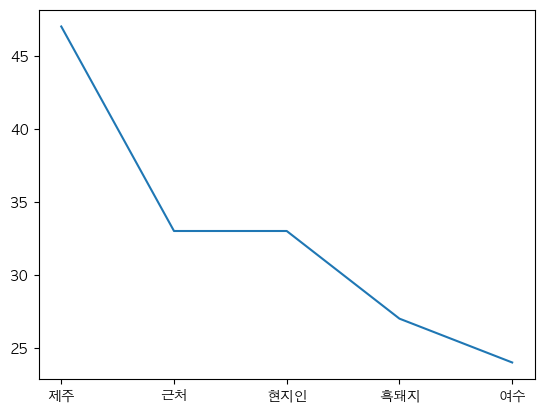

In [255]:
import matplotlib.pyplot as plt
from matplotlib import rc
keys, values = top_5_keyword.keys(), top_5_keyword.values()

rc('font', family='AppleGothic')
plt.plot(keys, values)
plt.rcParams['axes.unicode_minus'] = False
plt.show()

# ChatGPT API 연동

In [1]:
!pip install openai

  Obtaining dependency information for openai from https://files.pythonhosted.org/packages/b6/a4/dcecd835eeba1275c8a2db87f261a70c53f17a69072d153ac322123edb59/openai-1.3.8-py3-none-any.whl.metadata
  Obtaining dependency information for httpx<1,>=0.23.0 from https://files.pythonhosted.org/packages/a2/65/6940eeb21dcb2953778a6895281c179efd9100463ff08cb6232bb6480da7/httpx-0.25.2-py3-none-any.whl.metadata
  Obtaining dependency information for httpcore==1.* from https://files.pythonhosted.org/packages/56/ba/78b0a99c4da0ff8b0f59defa2f13ca4668189b134bd9840b6202a93d9a0f/httpcore-1.0.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/221.5 kB ? eta -:--:--
   --------------------------------------- 221.5/221.5 kB 13.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/75.0 kB ? eta -:--:--
   ---------------------------------------- 75.0/75.0 kB ? eta 0:00:00
   ---------------------------------------- 0.0/76.9 kB ? eta -:--:--
   -------------------------

In [2]:
pip install --upgrade openai

Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
from openai import OpenAI

In [5]:
client = OpenAI(
  api_key= "",  # this is also the default, it can be omitted
)


# openai.api_key = ""
# openai.Model.list()

In [6]:
for m in client.models.list():
    print(m)

Model(id='text-search-babbage-doc-001', created=1651172509, object='model', owned_by='openai-dev')
Model(id='curie-search-query', created=1651172509, object='model', owned_by='openai-dev')
Model(id='text-davinci-003', created=1669599635, object='model', owned_by='openai-internal')
Model(id='text-search-babbage-query-001', created=1651172509, object='model', owned_by='openai-dev')
Model(id='babbage', created=1649358449, object='model', owned_by='openai')
Model(id='babbage-search-query', created=1651172509, object='model', owned_by='openai-dev')
Model(id='text-babbage-001', created=1649364043, object='model', owned_by='openai')
Model(id='text-similarity-davinci-001', created=1651172505, object='model', owned_by='openai-dev')
Model(id='davinci-similarity', created=1651172509, object='model', owned_by='openai-dev')
Model(id='code-davinci-edit-001', created=1649880484, object='model', owned_by='openai')
Model(id='curie-similarity', created=1651172510, object='model', owned_by='openai-dev')


In [12]:
input_text = "인공지능이 뭐야"

In [ ]:
response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "user",
         "content": input_text}
        ]
)

In [ ]:
type(response)

In [ ]:
response

In [ ]:
response.choices

In [ ]:
response.choices[0].message.content

In [ ]:
def chatgpt(input_text):
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[{"role": "user", "content": input_text}]
    )
    output = response.choices[0].message.content
    return output

In [ ]:
chatgpt('what is ai')